In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

test_filename = '../data/test.csv'
train_filename = '../data/train.csv'
test_df = pd.read_csv(test_filename)
train_df = pd.read_csv(train_filename)



In [ ]:

def pos_pixel(size, i ,j):
    return i*size + j

def dimension_reduction(data_pixel, symmetry_type = 0):
    def intensity():

        return np.sum(image)/255.0
    def symmetry():
        size = 28
        sv = 0
        sh = 0
        for i in range(size):
            for j in range(int(size/2)):
        
                p1 = image[pos_pixel(size, i, j)]
                p2 = image[pos_pixel(size, i, (size-1)-j)]
                sv += abs(p1 - p2)
                
                p1 = image[pos_pixel(size, j, i)]
                p2 = image[pos_pixel(size, (size-1)-j, i)]
                sh += abs(p1 - p2)

        sv = sv/255
        sh = sh/255

        s = 0

        
        if symmetry_type == 0:
            s = sv
        elif symmetry_type == 1:
            s = sh
        elif symmetry_type == 2:
            s = pow(sv - sh, 2)
        elif symmetry_type == 3:
            s = sv + sh
        elif symmetry_type == 4:
            s = abs(sv - sh)

        
        return s

    id = data_pixel[0]
    label = data_pixel[1]

    image = np.array(data_pixel[2:])
    intensity = intensity()
    symmetry = symmetry()

    return label, intensity, symmetry
    

In [ ]:
def reduction_sample_dimension(dataset, symmetry_type = 0):
    new_df = []

    for row in dataset.iterrows():
        new_df.append(dimension_reduction(row[1], symmetry_type))

    return new_df

In [ ]:
def plot_df(df, quant = 1000):
   for line in df.iterrows():
    
      if line[0]  == quant:
         break

      data = line[1]
      label = int(data[0])
      x = data[1]
      y = data[2]


      if label == 1:
         plt.scatter(y, x, c='blue')
      elif label == 5:
      # else:
         plt.scatter(y, x, c='red')



   plt.show()

In [3]:
test_df

,Unnamed: 0,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14222,41979,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14223,41984,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14224,41992,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14225,41993,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df

,Unnamed: 0,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27768,41994,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27769,41995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27770,41996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27771,41997,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


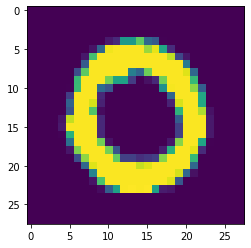

In [6]:
data_image = test_df.loc[0]
img = np.array(data_image[2:])
img = np.reshape(img, (28, 28))
plt.imshow(img)

In [9]:
sym = 3

new_test_df = reduction_sample_dimension(test_df, sym)
new_train_df = reduction_sample_dimension(train_df, sym)

In [10]:
new_train_df = pd.DataFrame(new_train_df, columns=['label', 'intensity', 'symmetry'])
new_test_df = pd.DataFrame(new_test_df, columns=['label', 'intensity', 'symmetry'])

In [11]:
new_train_df

,label,intensity,symmetry
0,1,65.290196,110.729412
1,1,52.647059,16.588235
2,0,90.435294,103.545098
3,7,67.262745,89.866667
4,3,95.247059,120.988235
...,...,...,...
27768,4,125.752941,135.654902
27769,0,114.941176,138.156863
27770,1,52.607843,49.952941
27771,7,123.545098,139.027451


In [12]:
new_test_df

,label,intensity,symmetry
0,0,174.937255,40.321569
1,4,58.921569,87.819608
2,0,200.364706,73.388235
3,5,109.490196,133.741176
4,1,34.839216,53.984314
...,...,...,...
14222,4,81.396078,119.043137
14223,3,150.439216,205.019608
14224,9,112.478431,113.576471
14225,6,135.486275,135.121569


In [13]:
new_test_df.to_csv('data/test_redu.csv', index= False)
new_train_df.to_csv('data/train_redu.csv', index= False)


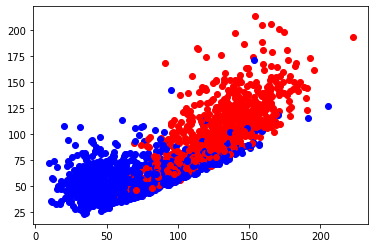

In [17]:
plot_df(new_test_df, 10000)